In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Import the API key.
from config import weather_api_key
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=465044665732f2c02a9a3593d2b86a5b


In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kloulklubed pw
regina ca
eureka us
daxian cn
albany au
lushunkou cn
jamestown sh
hobart au
baiyin cn
clyde river ca
tsihombe mg
haines junction ca
taolanaro mg
east london za
barrow us
gidole et
batemans bay au
bethel us
hermanus za
bathsheba bb
abomsa et
sentyabrskiy ru
vestmannaeyjar is
saint-philippe re
katherine au
mataura pf
rikitea pf
pasadena us
lebu cl
abu zabad sd
hilo us
barrow us
ancud cl
busselton au
palana ru
yanan cn
poum nc
port hardy ca
glushkovo ru
norman wells ca
port elizabeth za
saint-louis re
yellowknife ca
verkhnevilyuysk ru
rikitea pf
inuvik ca
nikolskoye ru
esperance au
saint-pierre pm
ushuaia ar
rikitea pf
sheregesh ru
lorengau pg
ilulissat gl
abadiania br
port alfred za
beringovskiy ru
san patricio mx
san cristobal ec
ancud cl
rikitea pf
busselton au
salalah om
vila velha br
mataura pf
rikitea pf
port elizabeth za
lorengau pg
panan ph
kalaleh ir
seguela ci
ushuaia ar
puerto narino co
mys shmidta ru
bluff nz
hermanus za
vaini to
sawtell au
yellowknife ca
hilo u

hirara jp
bathsheba bb
ribeira grande pt
ushuaia ar
bluff nz
hermanus za
san patricio mx
valdivia cl
college us
hermanus za
bredasdorp za
lagoa pt
khatanga ru
barrow us
ushuaia ar
vila franca do campo pt
port alfred za
zhangjiakou cn
rikitea pf
naze jp
taolanaro mg
vao nc
nikolskoye ru
vestmannaeyjar is
mahebourg mu
punta arenas cl
praia da vitoria pt
port elizabeth za
east london za
garden city us
busselton au
saint george bm
new norfolk au
busselton au
varna ru
taolanaro mg
tooele us
vaini to
tecoanapa mx
atuona pf
castro cl
busselton au
dunedin nz
mar del plata ar
pierre us
namibe ao
hearst ca
thompson ca
ushuaia ar
kaitangata nz
punta arenas cl
taolanaro mg
korla cn
taolanaro mg
rincon an
busselton au
cayenne gf
klyuchi ru
muros es
bethel us
souillac mu
thompson ca
hobyo so
pangody ru
saint-pierre pm
cherskiy ru
pevek ru
arraial do cabo br
hilo us
taoudenni ml
ancud cl
ponta do sol cv
waddan ly
ribeira grande pt
butaritari ki
kapaa us
port elizabeth za
jumla np
te anau nz
rikitea p

cape town za


In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

628

In [8]:
import requests
requests.__version__

'2.25.1'

In [9]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [42]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [ ]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

In [46]:
record_count += 1
# Run an API request for each of the cities.
try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

-----------------------------
Data Retrieval Complete      
-----------------------------


In [12]:
len(city_data)

578

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kloulklubed,7.0419,134.2556,82.40,78,75,5.75,PW,2021-02-14 09:26:13
1,Regina,50.4501,-104.6178,-31.00,75,1,2.30,CA,2021-02-14 09:21:27
2,Eureka,40.8021,-124.1637,44.01,96,78,4.74,US,2021-02-14 09:26:13
3,Albany,42.6001,-73.9662,19.00,48,100,1.74,US,2021-02-14 09:26:13
4,Jamestown,42.0970,-79.2353,23.00,93,90,12.66,US,2021-02-14 09:26:13
5,Hobart,-42.8794,147.3294,64.99,72,75,11.50,AU,2021-02-14 09:23:24
6,Baiyin,36.5583,104.2081,41.00,26,0,17.90,CN,2021-02-14 09:26:14
7,Clyde River,70.4692,-68.5914,-2.20,84,100,4.61,CA,2021-02-14 09:26:14
8,Haines Junction,60.7522,-137.5108,-27.40,68,42,1.14,CA,2021-02-14 09:26:14
9,East London,-33.0153,27.9116,82.40,74,20,16.11,ZA,2021-02-14 09:26:15


In [14]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kloulklubed,PW,2021-02-14 09:26:13,7.0419,134.2556,82.40,78,75,5.75
1,Regina,CA,2021-02-14 09:21:27,50.4501,-104.6178,-31.00,75,1,2.30
2,Eureka,US,2021-02-14 09:26:13,40.8021,-124.1637,44.01,96,78,4.74
3,Albany,US,2021-02-14 09:26:13,42.6001,-73.9662,19.00,48,100,1.74
4,Jamestown,US,2021-02-14 09:26:13,42.0970,-79.2353,23.00,93,90,12.66
5,Hobart,AU,2021-02-14 09:23:24,-42.8794,147.3294,64.99,72,75,11.50
6,Baiyin,CN,2021-02-14 09:26:14,36.5583,104.2081,41.00,26,0,17.90
7,Clyde River,CA,2021-02-14 09:26:14,70.4692,-68.5914,-2.20,84,100,4.61
8,Haines Junction,CA,2021-02-14 09:26:14,60.7522,-137.5108,-27.40,68,42,1.14
9,East London,ZA,2021-02-14 09:26:15,-33.0153,27.9116,82.40,74,20,16.11


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

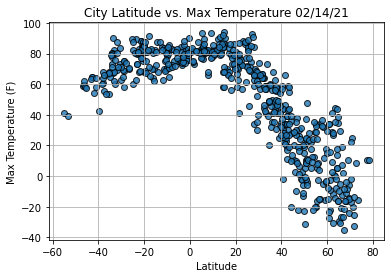

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

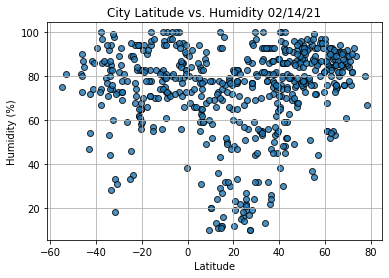

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

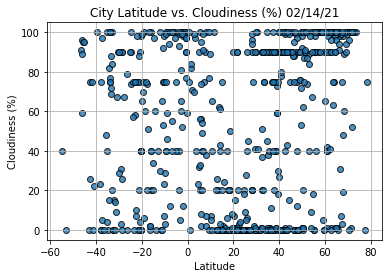

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

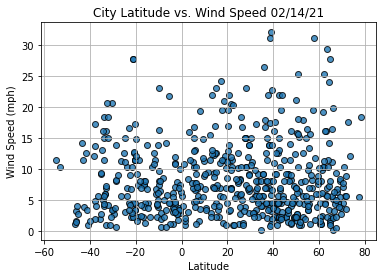

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [ ]:
# Import linregress
from scipy.stats import linregress

In [41]:
# Create a linear regression function 
def plot_linear_regression(x_values, y_values, title, y_label, text_coord):
    
    # Get linear regression data 
    (slope, intercept, r_value, p_value, stderr) = linregress(x_values, y_values)
    lin_reg_lst = (slope, intercept, r_value, p_value, stderr)
    lin_reg_df = pd.DataFrame({"Slope":slope,
                               "Intercept":intercept,
                               "r Value":r_value,
                               "p Value":p_value,
                               "Std Error":stderr}, index=[0])
    
    print(lin_reg_df)
    # Calculate regress y_values using linear regression data above 
    regress_values = x_values * slope + intercept
    
    # Get equation for linear regression line 
    line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create Scatter plot with linear regression line 
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, color="r")
    
    # Annotate text for linear regression equation 
    plt.annotate(line_eq, text_coord, fontsize=15, color="red")
    
    # Add title and labels
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                       Bethel
Country                        US
Date          2021-02-14 09:26:15
Lat                       41.3712
Lng                       -73.414
Max Temp                     25.0
Humidity                       80
Cloudiness                     90
Wind Speed                   3.44
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
573    False
574     True
575     True
576     True
577    False
Name: Lat, Length: 578, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kloulklubed,PW,2021-02-14 09:26:13,7.0419,134.2556,82.40,78,75,5.75
1,Regina,CA,2021-02-14 09:21:27,50.4501,-104.6178,-31.00,75,1,2.30
2,Eureka,US,2021-02-14 09:26:13,40.8021,-124.1637,44.01,96,78,4.74
3,Albany,US,2021-02-14 09:26:13,42.6001,-73.9662,19.00,48,100,1.74
4,Jamestown,US,2021-02-14 09:26:13,42.0970,-79.2353,23.00,93,90,12.66
...,...,...,...,...,...,...,...,...,...
569,Havre-Saint-Pierre,CA,2021-02-14 09:28:03,50.2334,-63.5986,-0.40,78,1,6.91
572,San Bartolome De Tirajana,ES,2021-02-14 09:28:04,27.9248,-15.5733,66.00,77,20,14.97
574,Berbera,SO,2021-02-14 09:28:04,10.4396,45.0143,79.61,52,0,9.17
575,Yumen,CN,2021-02-14 09:28:04,40.2833,97.2000,37.20,65,0,10.96


In [25]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kloulklubed,PW,2021-02-14 09:26:13,7.0419,134.2556,82.40,78,75,5.75
1,Regina,CA,2021-02-14 09:21:27,50.4501,-104.6178,-31.00,75,1,2.30
2,Eureka,US,2021-02-14 09:26:13,40.8021,-124.1637,44.01,96,78,4.74
3,Albany,US,2021-02-14 09:26:13,42.6001,-73.9662,19.00,48,100,1.74
4,Jamestown,US,2021-02-14 09:26:13,42.0970,-79.2353,23.00,93,90,12.66


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

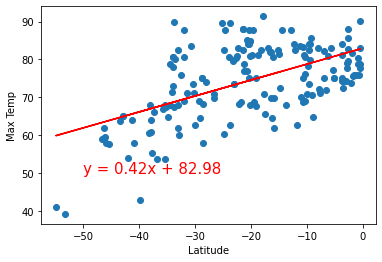

In [27]:
# Linear regression on the Southern Hemisphere max temps
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature',
                       'Max Temp',(-50,50))

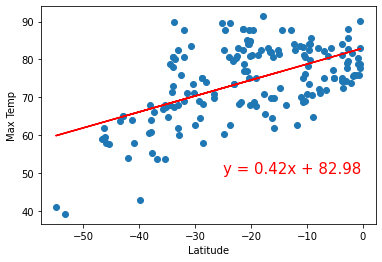

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-25,50))

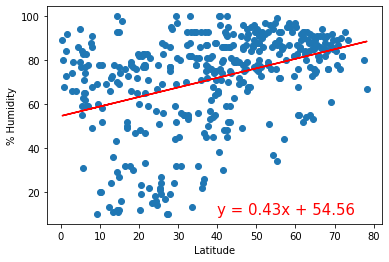

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

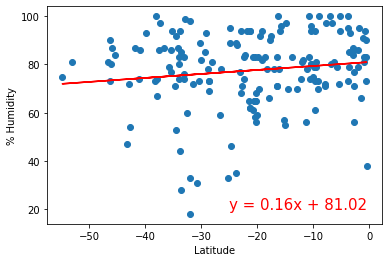

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-25,20))

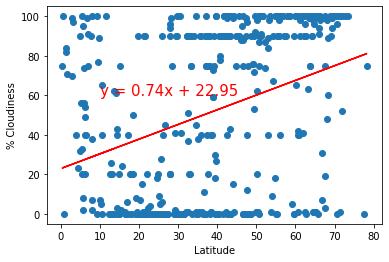

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

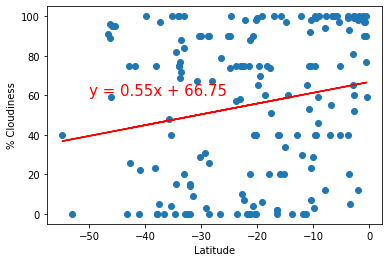

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for % Cloudiness', '% Cloudiness',(-50,60))

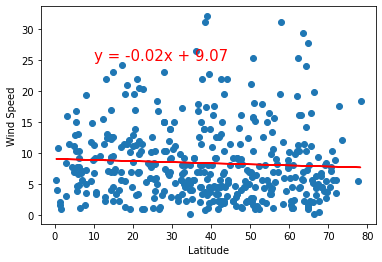

In [37]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(10,25))

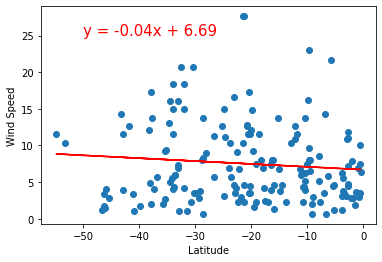

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))